In [24]:
from openff.toolkit import Molecule, Topology, ForceField
from openff.interchange import Interchange
from openff.units import unit, Quantity
from openff.toolkit.utils.toolkits import NAGLToolkitWrapper
import numpy as np
from openff.interchange.components._packmol import pack_box

In [25]:
anion_smiles = 'C(F)(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F'
cation_smiles = ['CCCn1cc[n+](C)c1','CCCCn1cc[n+](C)c1',
                 'CCCCCn1cc[n+](C)c1','CCCCCCn1cc[n+](C)c1','CCCCCCCn1cc[n+](C)c1',
                 'CC(C)n1cc[n+](C)c1','CC(C)Cn1cc[n+](C)c1','CC(C)CCn1cc[n+](C)c1',
                  'CC(C)CCCn1cc[n+](C)c1','CC(C)CCCCn1cc[n+](C)c1']

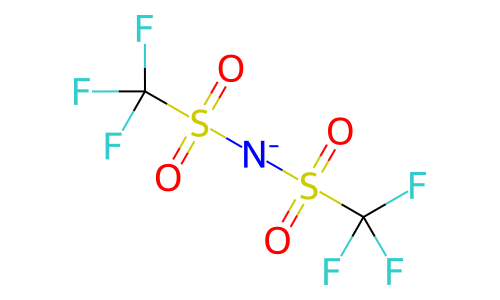

In [26]:
anion = Molecule.from_smiles(anion_smiles)
anion.visualize()

In [27]:
cations = list()
for cat in cation_smiles:
    molecule = Molecule.from_smiles(cat)
    cations.append(molecule)

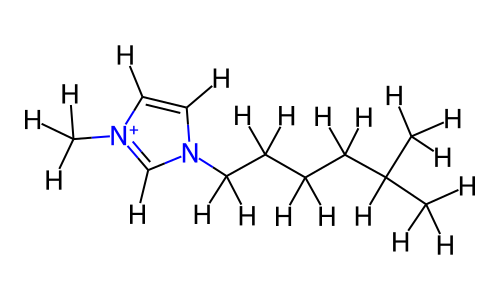

In [28]:
cations[-1].visualize()  # change the index to visualize others

In [29]:
# assign a force field
sage = ForceField("openff-2.2.0.offxml")
# big box
cubic_box = unit.Quantity(80 * np.eye(3), unit.angstrom)

In [33]:
anion.generate_conformers(n_conformers=1)
NAGLToolkitWrapper().assign_partial_charges(anion, 'openff-gnn-am1bcc-0.1.0-rc.3.pt')    
print(f"Anion charges = {sum(anion.partial_charges):.10e}")

for i,cat in enumerate(cations):
    print(f'processing {cat.to_smiles()}')
    # use RDkit to generate a conformer
    cat.generate_conformers(n_conformers=1)
    NAGLToolkitWrapper().assign_partial_charges(cat, 'openff-gnn-am1bcc-0.1.0-rc.3.pt')
    print(f"cation{i} charges = {sum(cat.partial_charges):.10e}")


Anion charges = -1.0000000000e+00 elementary_charge
processing [H][C]1=[C]([H])[N+]([C]([H])([H])[H])=[C]([H])[N]1[C]([H])([H])[C]([H])([H])[C]([H])([H])[H]
cation0 charges = 1.0000000000e+00 elementary_charge
processing [H][C]1=[C]([H])[N+]([C]([H])([H])[H])=[C]([H])[N]1[C]([H])([H])[C]([H])([H])[C]([H])([H])[C]([H])([H])[H]
cation1 charges = 1.0000000000e+00 elementary_charge
processing [H][C]1=[C]([H])[N+]([C]([H])([H])[H])=[C]([H])[N]1[C]([H])([H])[C]([H])([H])[C]([H])([H])[C]([H])([H])[C]([H])([H])[H]
cation2 charges = 1.0000000000e+00 elementary_charge
processing [H][C]1=[C]([H])[N+]([C]([H])([H])[H])=[C]([H])[N]1[C]([H])([H])[C]([H])([H])[C]([H])([H])[C]([H])([H])[C]([H])([H])[C]([H])([H])[H]
cation3 charges = 1.0000000000e+00 elementary_charge
processing [H][C]1=[C]([H])[N+]([C]([H])([H])[H])=[C]([H])[N]1[C]([H])([H])[C]([H])([H])[C]([H])([H])[C]([H])([H])[C]([H])([H])[C]([H])([H])[C]([H])([H])[H]
cation4 charges = 1.0000000000e+00 elementary_charge
processing [H][C]1=[C]([H])[

In [106]:
n_anion = 300
n_cation = 300
il_interchanges = list()
for cat in cations:
    print(f'packing {cat.to_smiles()}')

    packed_mixture_topology = pack_box(
        molecules=[anion,cat],
        number_of_copies=[n_anion,n_cation],
        solute=None,
        tolerance=1.0*unit.angstrom,
        box_vectors=cubic_box,
    )
    
    interchange = Interchange.from_smirnoff(
        force_field=ForceField("openff-2.2.0.offxml"),charge_from_molecules=[anion,cat],
        topology=packed_mixture_topology, box=cubic_box
    )
    il_interchanges.append(interchange)


packing [H][C]1=[C]([H])[N+]([C]([H])([H])[H])=[C]([H])[N]1[C]([H])([H])[C]([H])([H])[C]([H])([H])[H]
packing [H][C]1=[C]([H])[N+]([C]([H])([H])[H])=[C]([H])[N]1[C]([H])([H])[C]([H])([H])[C]([H])([H])[C]([H])([H])[H]
packing [H][C]1=[C]([H])[N+]([C]([H])([H])[H])=[C]([H])[N]1[C]([H])([H])[C]([H])([H])[C]([H])([H])[C]([H])([H])[C]([H])([H])[H]
packing [H][C]1=[C]([H])[N+]([C]([H])([H])[H])=[C]([H])[N]1[C]([H])([H])[C]([H])([H])[C]([H])([H])[C]([H])([H])[C]([H])([H])[C]([H])([H])[H]
packing [H][C]1=[C]([H])[N+]([C]([H])([H])[H])=[C]([H])[N]1[C]([H])([H])[C]([H])([H])[C]([H])([H])[C]([H])([H])[C]([H])([H])[C]([H])([H])[C]([H])([H])[H]
packing [H][C]1=[C]([H])[N+]([C]([H])([H])[H])=[C]([H])[N]1[C]([H])([C]([H])([H])[H])[C]([H])([H])[H]
packing [H][C]1=[C]([H])[N+]([C]([H])([H])[H])=[C]([H])[N]1[C]([H])([H])[C]([H])([C]([H])([H])[H])[C]([H])([H])[H]
packing [H][C]1=[C]([H])[N+]([C]([H])([H])[H])=[C]([H])[N]1[C]([H])([H])[C]([H])([H])[C]([H])([C]([H])([H])[H])[C]([H])([H])[H]
packing [H][C]1

In [107]:
for cat,il_int in zip(cations,il_interchanges): # approximately minimize energy with OpenMM
    print(f'minimizing energy of {cat.to_smiles()} + anion')
    il_int.minimize()

minimizing energy of [H][C]1=[C]([H])[N+]([C]([H])([H])[H])=[C]([H])[N]1[C]([H])([H])[C]([H])([H])[C]([H])([H])[H] + anion
minimizing energy of [H][C]1=[C]([H])[N+]([C]([H])([H])[H])=[C]([H])[N]1[C]([H])([H])[C]([H])([H])[C]([H])([H])[C]([H])([H])[H] + anion
minimizing energy of [H][C]1=[C]([H])[N+]([C]([H])([H])[H])=[C]([H])[N]1[C]([H])([H])[C]([H])([H])[C]([H])([H])[C]([H])([H])[C]([H])([H])[H] + anion
minimizing energy of [H][C]1=[C]([H])[N+]([C]([H])([H])[H])=[C]([H])[N]1[C]([H])([H])[C]([H])([H])[C]([H])([H])[C]([H])([H])[C]([H])([H])[C]([H])([H])[H] + anion
minimizing energy of [H][C]1=[C]([H])[N+]([C]([H])([H])[H])=[C]([H])[N]1[C]([H])([H])[C]([H])([H])[C]([H])([H])[C]([H])([H])[C]([H])([H])[C]([H])([H])[C]([H])([H])[H] + anion
minimizing energy of [H][C]1=[C]([H])[N+]([C]([H])([H])[H])=[C]([H])[N]1[C]([H])([C]([H])([H])[H])[C]([H])([H])[H] + anion
minimizing energy of [H][C]1=[C]([H])[N+]([C]([H])([H])[H])=[C]([H])[N]1[C]([H])([H])[C]([H])([C]([H])([H])[H])[C]([H])([H])[H] + an

In [108]:
# now print out files
for i,il in enumerate(il_interchanges):
    # gromacs files
    il.to_gro(f'il{i:d}.gro')
    il.to_top(f'il{i:d}.top')
    il.to_lammps(f'il{i:d}.lmp')

### IL with neutrals

In [172]:
# we already generated the topology for the IL (it was cations[3] - lets verify by visualizing

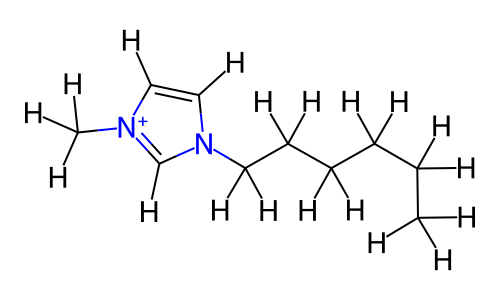

In [173]:
cations[3].visualize()

In [179]:
tetraglyme_smiles = 'COCCOCCOCCOCCOC'

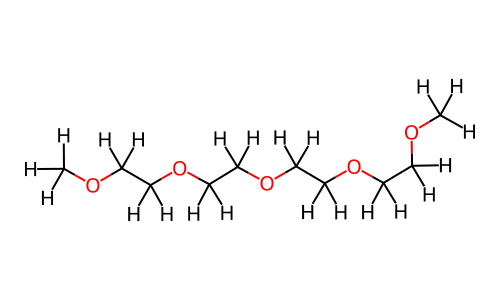

In [180]:
tetra = Molecule.from_smiles(tetraglyme_smiles)
tetra.generate_conformers(n_conformers=1)
NAGLToolkitWrapper().assign_partial_charges(tetra, 'openff-gnn-am1bcc-0.1.0-rc.3.pt')
tetra.visualize()

In [182]:
n_ions = [270,240,210,180,150]
n_tetra = [30,60,90,120,150]
percent_tetra = [10,20,30,40,50]

for n1,n2,p in zip(n_ions,n_tetra,percent_tetra):
    print(f"working on percent tetra {p}({n1}:{n2})")
    
    packed_mixture_topology = pack_box(
        molecules=[anion,cations[3],tetra],
        number_of_copies=[n1,n1,n2],
        solute=None,
        tolerance=1.0*unit.angstrom,
        box_vectors=cubic_box,
    )
    
    interchange = Interchange.from_smirnoff(
        force_field=ForceField("openff-2.2.0.offxml"),charge_from_molecules=[anion,cations[3],tetra],
        topology=packed_mixture_topology, box=cubic_box
    )

    interchange.minimize()
    interchange.to_gro(f'il_neutral{p:d}.gro')
    interchange.to_top(f'il_neutral{p:d}.top')
    interchange.to_lammps(f'il_neutral{p:d}.lmp')


working on percent tetra 10(270:30)
working on percent tetra 20(240:60)
working on percent tetra 30(210:90)
working on percent tetra 40(180:120)
working on percent tetra 50(150:150)


### Deep Eutectics

In [17]:
# bigish box
cubic_box = unit.Quantity(60 * np.eye(3), unit.angstrom)
n_ccl = [250,200,175,150,125,0]
n_eg = [500,600,700,750,750,1000]
ratios = [12,13,14,15,16,0]
EG_smiles = 'OCCO'
choline_smiles = 'C[N+](C)(C)CCO' 
CL_smiles = '[Cl-]'

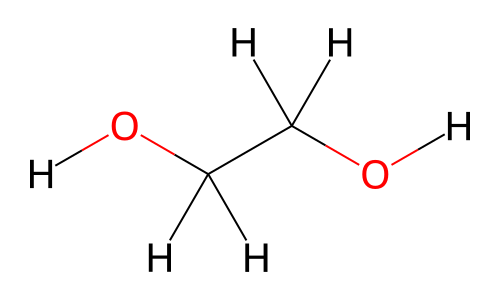

In [19]:
eg = Molecule.from_smiles(EG_smiles)
eg.generate_conformers(n_conformers=1)
NAGLToolkitWrapper().assign_partial_charges(eg, 'openff-gnn-am1bcc-0.1.0-rc.3.pt')
eg.visualize()

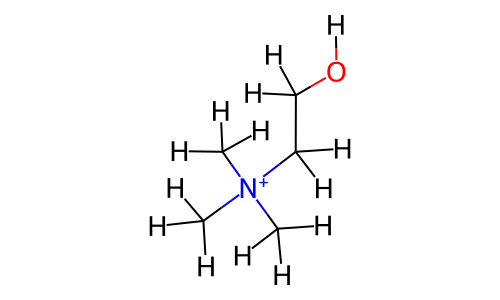

In [20]:
choline = Molecule.from_smiles(choline_smiles)
choline.generate_conformers(n_conformers=1)
NAGLToolkitWrapper().assign_partial_charges(choline, 'openff-gnn-am1bcc-0.1.0-rc.3.pt')
choline.visualize()

In [21]:
import openff.units
cl = Molecule.from_smiles(CL_smiles)
cl.generate_conformers(n_conformers=1)
# kludge, there's probably a better way to do this.
cl.partial_charges = np.asarray([-1]) * openff.units.unit.elementary_charge

In [22]:
for n1,n2,r in zip(n_ccl,n_eg,ratios):
    if r==0:
        break
    print(f"working on ratio {r}({n1}:{n2})")
    
    packed_mixture_topology = pack_box(
        molecules=[choline,cl,eg],
        number_of_copies=[n1,n1,n2],
        solute=None,
        tolerance=1.0*unit.angstrom,
        box_vectors=cubic_box,
    )
    
    interchange = Interchange.from_smirnoff(
        force_field=ForceField("openff-2.2.0.offxml"),charge_from_molecules=[choline,cl,eg],
        topology=packed_mixture_topology, box=cubic_box
    )

    interchange.minimize()
    interchange.to_gro(f'des{r:d}.gro')
    interchange.to_top(f'des{r:d}.top')
    interchange.to_lammps(f'des{r:d}.lmp')

working on ratio 12(250:500)
working on ratio 13(200:600)
working on ratio 14(175:700)
working on ratio 15(150:750)
working on ratio 16(125:750)


In [23]:
print(f"working on eg_pure ({0}:{1000})")
    
packed_mixture_topology = pack_box(
    molecules=[eg],
    number_of_copies=[n_eg[-1]],
    solute=None,
    tolerance=1.0*unit.angstrom,
    box_vectors=cubic_box,
)
    
interchange = Interchange.from_smirnoff(
    force_field=ForceField("openff-2.2.0.offxml"),charge_from_molecules=[eg],
    topology=packed_mixture_topology, box=cubic_box
)

interchange.minimize()
interchange.to_gro(f'despure_eg.gro')
interchange.to_top(f'despure_eg.top')
interchange.to_lammps(f'despure_eg.lmp')

working on eg_pure (0:1000)


In [36]:
help(interchange.to_lammps)

Help on method to_lammps in module openff.interchange.components.interchange:

to_lammps(file_path: pathlib.Path | str, writer='internal') method of openff.interchange.components.interchange.Interchange instance
    Export this Interchange to a LAMMPS data file.

